# 1. Introduction to Agents

## Messages and Special Tokens
-  https://huggingface.co/learn/agents-course/unit1/messages-and-special-tokens

```conversation = [
    {"role": "user", "content": "I need help with my order"},
    {"role": "assistant", "content": "I'd be happy to help. Could you provide your order number?"},
    {"role": "user", "content": "It's ORDER-123"},
]
```

conversation will be converted to prompt with format like this(SmolLM2) - chat template:
```
<|im_start|>system
You are a helpful AI assistant named SmolLM, trained by Hugging Face<|im_end|>
<|im_start|>user
I need help with my order<|im_end|>
<|im_start|>assistant
I'd be happy to help. Could you provide your order number?<|im_end|>
<|im_start|>user
It's ORDER-123<|im_end|>
<|im_start|>assistant
```

while Lllam 3.2 format like this:
```<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 10 Feb 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I need help with my order<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I'd be happy to help. Could you provide your order number?<|eot_id|><|start_header_id|>user<|end_header_id|>

It's ORDER-123<|eot_id|><|start_header_id|>assistant<|end_header_id|>
```

### Chat-Templates
As mentioned, chat templates are essential for structuring conversations between language models and users. They guide how message exchanges are formatted into a single prompt.

#### Base Models vs. Instruct Models
Another point we need to understand is the difference between a Base Model vs. an Instruct Model:

A Base Model is trained on raw text data to predict the next token.

An ```Instruct Model is fine-tuned specifically to follow instructions and engage in conversations```. For example, SmolLM2-135M is a base model, while SmolLM2-135M-Instruct is its instruction-tuned variant.

To make a Base Model behave like an instruct model, we need to format our prompts in a consistent way that the model can understand. This is where chat templates come in.

ChatML is one such template format that structures conversations with clear role indicators (system, user, assistant). If you have interacted with some AI API lately, you know that’s the standard practice.

## Thought-Action-Observation Cycle
- https://huggingface.co/learn/agents-course/unit1/agent-steps-and-structure

### thinking (Thought) → acting (Act) and observing (Observe).

Let’s break down these actions together:

- Thought: The LLM part of the Agent decides what the next step should be.
- Action: The agent takes an action, by calling the tools with the associated arguments.
- Observation: The model reflects on the response from the tool.

| Type of Thought | Example |
| --- | --- |
| Planning | “I need to break this task into three steps: 1) gather data, 2) analyze trends, 3) generate report” |
| Analysis | “Based on the error message, the issue appears to be with the database connection parameters” |
| Decision Making | “Given the user’s budget constraints, I should recommend the mid-tier option” |
| Problem Solving | “To optimize this code, I should first profile it to identify bottlenecks” |
| Memory Integration | “The user mentioned their preference for Python earlier, so I’ll provide examples in Python” |
| Self-Reflection | “My last approach didn’t work well, I should try a different strategy” |
| Goal Setting | “To complete this task, I need to first establish the acceptance criteria” |
| Prioritization | “The security vulnerability should be addressed before adding new features” |

### The Re-Act Approach
- “Reasoning” (Think) with “Acting” (Act)

CoT

| Type of Observation | Example |
| --- | --- |
| System Feedback | Error messages, success notifications, status codes |
| Data Changes | Database updates, file system modifications, state changes |
| Environmental Data | Sensor readings, system metrics, resource usage |
| Response Analysis | API responses, query results, computation outputs |
| Time-based Events | Deadlines reached, scheduled tasks completed |

In [ ]:
# This system prompt is a bit more complex and actually contains the function description already appended.
# Here we suppose that the textual description of the tools has already been appended
SYSTEM_PROMPT = """Answer the following questions as best you can. You have access to the following tools:

get_weather: Get the current weather in a given location

The way you use the tools is by specifying a json blob.
Specifically, this json should have a `action` key (with the name of the tool to use) and a `action_input` key (with the input to the tool going here).

The only values that should be in the "action" field are:
get_weather: Get the current weather in a given location, args: {"location": {"type": "string"}}
example use :
```
{{
  "action": "get_weather",
  "action_input": {"location": "New York"}
}}

ALWAYS use the following format:

Question: the input question you must answer
Thought: you should always think about one action to take. Only one action at a time in this format:
Action:
```
$JSON_BLOB
```
Observation: the result of the action. This Observation is unique, complete, and the source of truth.
... (this Thought/Action/Observation can repeat N times, you should take several steps when needed. The $JSON_BLOB must be formatted as markdown and only use a SINGLE action at a time.)

You must always end your output with the following format:

Thought: I now know the final answer
Final Answer: the final answer to the original input question

Now begin! Reminder to ALWAYS use the exact characters `Final Answer:` when you provide a definitive answer. """

### Unit 1 Quiz Certificate
 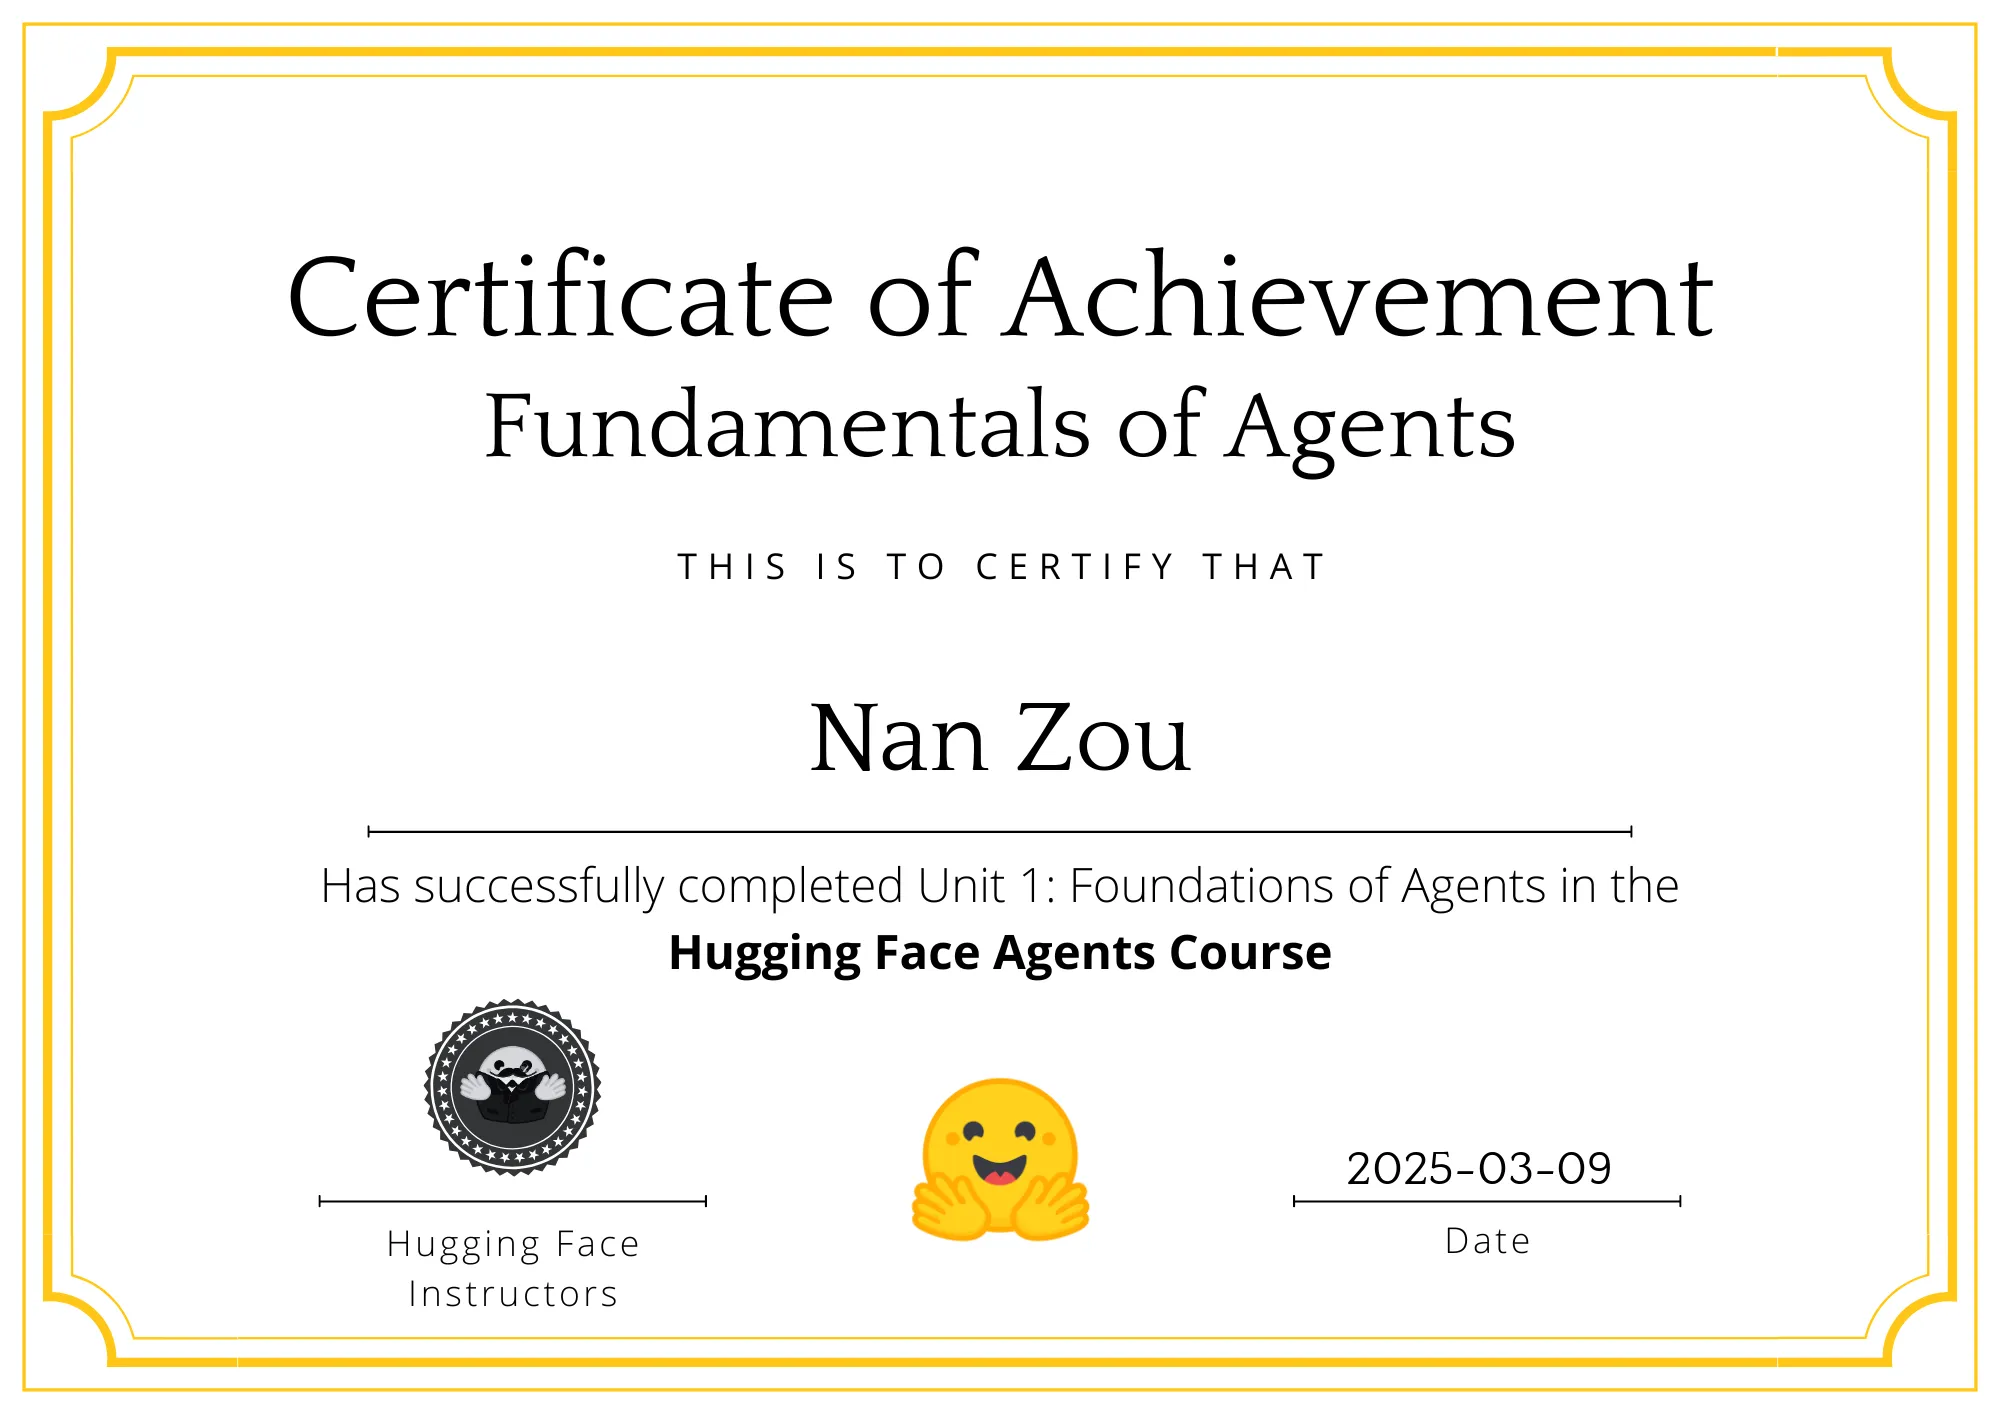

# 2. Agentic Frameworks